In [1]:
using Pkg
Pkg.add("CSV")

   Updating registry at `C:\Users\djc20\.julia\registries\General`
  Resolving package versions...
  Installed Adapt ──────────────────────── v2.3.0
  Installed OpenBLAS_jll ───────────────── v0.3.9+5
  Installed DataDeps ───────────────────── v0.7.3
  Installed Tables ─────────────────────── v1.1.0
  Installed FillArrays ─────────────────── v0.9.7
  Installed Grisu ──────────────────────── v1.0.0
  Installed DataStructures ─────────────── v0.18.8
  Installed RecipesBase ────────────────── v1.1.0
  Installed SentinelArrays ─────────────── v1.2.16
  Installed JSON ───────────────────────── v0.21.1
  Installed Compat ─────────────────────── v3.23.0
  Installed FiniteDiff ─────────────────── v2.7.1
  Installed Conda ──────────────────────── v1.5.0
  Installed WoodburyMatrices ───────────── v0.5.3
  Installed CompilerSupportLibraries_jll ─ v0.3.4+0
  Installed MacroTools ─────────────────── v0.5.6
  Installed Parsers ────────────────────── v1.0.11
  Installed DataAPI ──────────────────────

In [19]:
using CSV, Plots, Random, LinearAlgebra, Statistics, DataFrames


In [23]:
headlines = CSV.read("sentiment.csv")
#headlines.rename!(headlines, ["Day", "Score"])
rename!(headlines, ["sentiment"])

,sentiment
,Float64
1,0.0858615
2,-0.0980214
3,-0.0931667
4,0.00919
5,0.0
6,-0.1998
7,-0.190725
8,-0.0343133
9,-0.144262


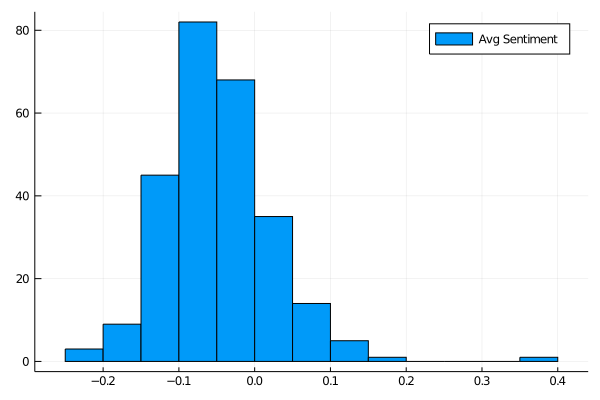

In [26]:
histogram(headlines.sentiment, label = "Avg Sentiment")

In [169]:
delta = CSV.read("delt.csv")
D = delta[1]

263-element Array{Float64,1}:
 58.257412
 59.061855
 58.72419
 58.495766
 58.495766
 58.495766
 58.495766
 58.317001
 58.509997999999996
 58.380001
 57.869999
 57.869999
 57.869999
  ⋮
 31.5
 31.98
 31.5
 33.720001
 34.0
 34.0
 34.0
 31.93
 30.709999
 29.65
 30.76
 30.639999

In [170]:
n = 263
train = convert(Int,floor(263*.8))
htrain = headlines[1:train,:sentiment]
htest = headlines[(train+1):end,:sentiment]
Dtrain = D[1:train]
Dtest = D[(train+1):end];

In [171]:
X = [htrain[2:end] Dtrain[2:end] ones(train-1)]
Xtest = [htest[2:end] Dtest[2:end] ones(n-train-1)]
y = Dtrain[1:end-1]
w = X\y
train_pred = X*w;
test_pred = Xtest*w;
function MSE(y, pred)
    return mean((y-pred).^2)
end
train_MSE = MSE(y,train_pred)
test_MSE = MSE(Dtest[1:end-1],test_pred);

In [172]:
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)
print(w)

Train MSE	2.4582723813815033
Test MSE 	0.784041034036323
[1.475330468510077, 1.0075694038443963, -0.023695464729552772]

In [177]:
function aerr(y,pred)
    return mean(abs.(y-pred))
end


aerr (generic function with 1 method)

In [178]:
train_abs = aerr(y,train_pred)
test_abs = aerr(Dtest[1:end-1],test_pred);
println("Train Abs Er\t", train_abs)
println("Test Abs ERr \t", test_abs)

Train Abs Er	0.9052050899430326
Test Abs ERr 	0.6238563994824395


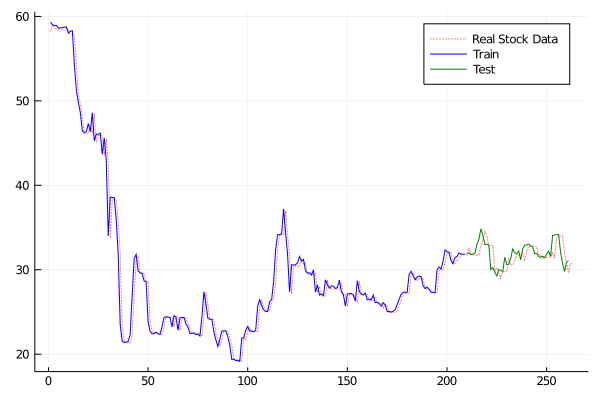

In [179]:
days = collect(1:263) 
plot(days, D, color=:red,linestyle=:dot, label="Real Stock Data")
plot!(days[1:train-1], train_pred, color = :blue, label = "Train")
plot!(days[train:end-2], test_pred, color = :green, label = "Test")

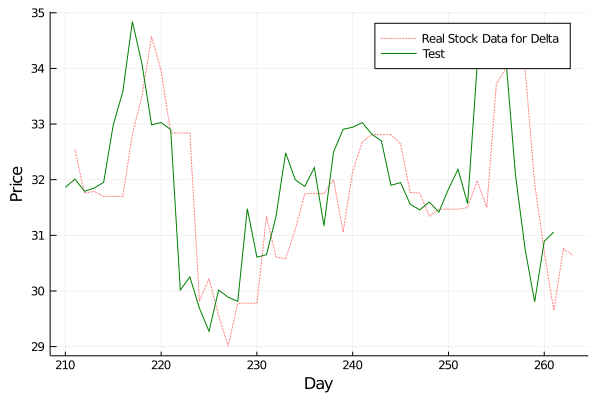

In [180]:
plot(days[train+1:end], Dtest, color=:red,linestyle=:dot, label="Real Stock Data for Delta")
#plot!(days[1:train-1], train_pred, color = :blue, label = "Train")
plot!(days[train:end-2], test_pred, color = :green, label = "Test")
xlabel!("Day")
ylabel!("Price")

In [181]:
hl = headlines[:sentiment].^3 #headlines[2:end,:sentiment]
X = [headlines[3:end,:sentiment] D[3:end] ones(n-2)]
y = D[2:end-1]
w = X\y
pred = X*w;


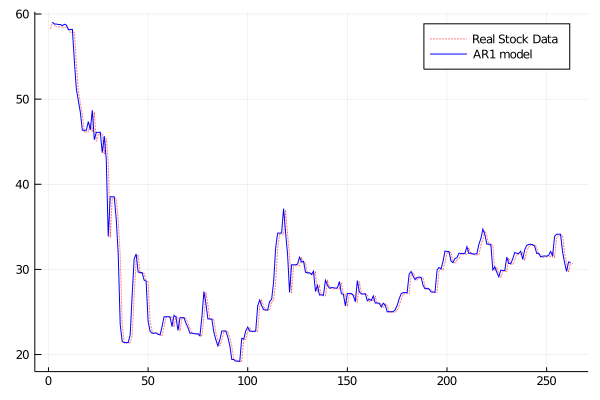

In [182]:
days = collect(1:263) 
plot(days, D, color=:red,linestyle=:dot, label="Real Stock Data")
plot!(days[2:end-1], pred, color=:blue, label="AR1 model")


# Costco

In [183]:
costco = CSV.read("costco.csv")
C = costco[1]

263-element Array{Float64,1}:
 308.713257
 313.12515299999995
 316.185669
 316.294952
 316.294952
 316.294952
 316.294952
 320.01129199999997
 320.97515899999996
 322.028442
 319.911957
 319.911957
 319.911957
   ⋮
 374.839661
 377.584381
 377.09533700000003
 375.02929700000004
 373.881531
 373.881531
 373.881531
 369.998962
 372.005127
 364.259979
 364.859985
 357.619995

In [184]:
n = 263
train = convert(Int,floor(263*.8))
htrain = headlines[1:train,:sentiment]
htest = headlines[(train+1):end,:sentiment]
Ctrain = C[1:train]
Ctest = C[(train+1):end];

In [190]:
X = [htrain[2:end] Ctrain[2:end] ones(train-1)]
Xtest = [htest[2:end] Ctest[2:end] ones(n-train-1)]
y = Ctrain[1:end-1]
w = X\y
train_pred = X*w;
test_pred = Xtest*w;
function MSE(y, pred)
    return mean((y-pred).^2)
end
train_MSE = MSE(y,train_pred)
test_MSE = MSE(Dtest[1:end-1],test_pred);

In [191]:
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)
print(w)

Train MSE	28.191742665573788
Test MSE 	104680.06835110356
[8.386154831416029, 0.9415731200701772, 18.48212676671458]

In [192]:
train_abs = aerr(y,train_pred)
test_abs = aerr(Dtest[1:end-1],test_pred);
println("Train Abs Er\t", train_abs)
println("Test Abs ERr \t", test_abs)

Train Abs Er	3.1938860488400653
Test Abs ERr 	323.2297489004764


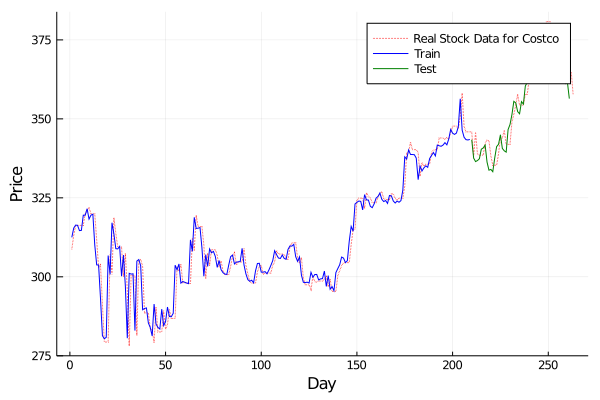

In [193]:
plot(days, C, color=:red,linestyle=:dot, label="Real Stock Data for Costco")
plot!(days[1:train-1], train_pred, color = :blue, label = "Train")
plot!(days[train:end-2], test_pred, color = :green, label = "Test")
xlabel!("Day")
ylabel!("Price")

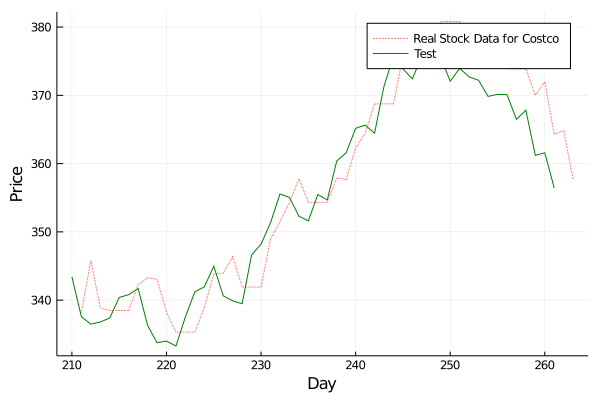

In [194]:
plot(days[train+1:end], Ctest, color=:red,linestyle=:dot, label="Real Stock Data for Costco")
plot!(days[train:end-2], test_pred, color = :green, label = "Test")
xlabel!("Day")
ylabel!("Price")